# Cursos de Series de tiempo con *Machine Learning*
## Modulo. Introduccion al modelo Arima - Actualización
                        Elaborado por: Naren Castellon

# **Modelo Arima**

Un modelo Arima, significa `**Promedio movil(MA), Integrado(I), Autorregresivo(AR)**`, es un modelo estadístico que utiliza datos de series de tiempo para comprender mejor el conjunto de datos o para predecir tendencias futuras. Es una forma de análisis de regresión que mide la fuerza de una variable dependiente en relación a otra variable cambiante

La modelación ARIMA, puede pronosticar una serie de tiempo utilizando los valores pasados de la serie. En esta sección, construimos un modelo ARIMA óptimo desde cero y lo ampliamos a los modelos Seasonal ARIMA (SARIMA) y SARIMAX. 

- También verá cómo construir modelos de autoarima.

- **19 de julio 2021**

Actual: 23 de Agosto 2024

<center><img src="imagen/Arima time series forecasting.png" width="900" height="500"></center>

**Contenido**

1. Introducción a la predicción de series de tiempo
2. Introducción a los modelos ARIMA
3. ¿Qué significan p, d y q en el modelo ARIMA?
3. ¿Qué son los modelos AR y MA?
4. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA
5. Cómo encontrar el orden del término AR (p)
6. Cómo encontrar el orden del término MA (q)
7. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia
7. Cómo construir el modelo ARIMA
8. Cómo encontrar el modelo ARIMA óptimo manualmente mediante la validación cruzada fuera de tiempo
9. Métricas de precisión para el pronóstico de series de tiempo
10. Cómo hacer Auto Arima Forecast en Python
11. Cómo interpretar las gráficas de residuos en el modelo ARIMA
12. Cómo construir automáticamente el modelo SARIMA en Python
13. Cómo construir el modelo SARIMAX con variable exógena

## **1. Introducción a la predicción de series de tiempo.**
Una serie de tiempo es una secuencia en la que se registra una métrica en intervalos de tiempo regulares.

Dependiendo de la frecuencia, una serie de tiempo puede ser 
* anual (por ejemplo, presupuesto anual), 
* trimestral (por ejemplo, gastos), 
* mensual (por ejemplo, tráfico aéreo), 
* semanal (por ejemplo, cantidad de ventas), 
* diaria (por ejemplo, clima), 
* por hora. (p. ej., precio de las acciones), 
* minutos (p. ej., llamadas entrantes en un galope de llamadas) e incluso 
* segundos (p. ej., tráfico web).

## **¿Por qué es necesario el Forecasting?**
El **forecasting**, o pronóstico, es una herramienta fundamental en el ámbito empresarial y en diversas áreas de la vida para anticipar y planificar el futuro en base a información pasada y presente. A continuación, se detallan algunas razones clave por las cuales el forecasting es una práctica necesaria:

### **1. Toma de Decisiones Informadas:**
- El forecasting proporciona a las organizaciones una visión anticipada de posibles escenarios futuros, lo que permite tomar decisiones estratégicas fundamentadas en lugar de reaccionar a eventos imprevistos.

### **2. Planificación y Estrategia:**
- Facilita la planificación a corto, mediano y largo plazo al prever demandas, necesidades de recursos, y cambios en el mercado, lo que ayuda a establecer metas realistas y diseñar estrategias efectivas.

### **3. Optimización de Recursos:**
- Permite a las empresas asignar recursos de manera eficiente al anticipar la demanda de productos o servicios, evitando excesos o insuficiencias que puedan resultar costosos.

### **4. Gestión de Inventarios y Producción:**
- El forecasting contribuye a gestionar de manera efectiva los niveles de inventario y programar la producción de manera óptima, evitando tanto la escasez como el exceso de stock.

### **5. Previsión Financiera:**
- Ayuda a proyectar los flujos de efectivo, los ingresos y los gastos futuros, lo que es crucial para la administración financiera y la toma de decisiones relacionadas con inversiones y financiamiento.

### **6. Mejora de la Atención al Cliente:**
- Al prever las necesidades y preferencias de los clientes, las empresas pueden ofrecer un servicio más personalizado y adaptado, lo que mejora la satisfacción del cliente y fomenta la fidelidad.

### **7. Gestión de Riesgos:**
- Permite identificar posibles riesgos y amenazas que podrían afectar a la organización en el futuro, lo que brinda la oportunidad de prepararse y mitigar dichos riesgos de manera proactiva.

### **8. Adaptación al Cambio:**
- Ayuda a las empresas a adaptarse a cambios en el entorno empresarial y a anticipar tendencias del mercado, lo que es esencial para mantener la competitividad y la relevancia a largo plazo.

En resumen, el forecasting es una práctica esencial para las organizaciones que desean operar de manera eficiente, tomar decisiones informadas, y anticipar y prepararse para los desafíos y oportunidades que el futuro pueda traer.

## **2. Introducción a los modelos ARIMA**
Entonces, ¿qué es exactamente un modelo ARIMA?

ARIMA, su abreviatura significa `**Autorregresivo(AR) integrada(I) Media móvil(MA)**` es en realidad una clase de modelos que 'explica' una serie de tiempo determinada en función de sus propios valores pasados, es decir, sus propios retrasos y los errores de pronóstico retrasados, de modo que se puede utilizar la ecuación para pronosticar valores futuros.

Cualquier serie de tiempo `**"no estacional"**` que muestre patrones y no sea un `**"ruido blanco"**` aleatorio se puede modelar con modelos ARIMA.

Un modelo ARIMA se caracteriza por 3 términos: p, d, q

dónde,

* p: es el orden del término AR

* q: es el orden del término MA

* :d es el número de diferenciaciones necesarias para que la serie de tiempo sea estacionaria

Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en SARIMA, abreviatura de "Seasonal ARIMA". Más sobre eso una vez que terminemos ARIMA.

Entonces, ¿qué significa el 'orden del término AR'? Antes de ir allí, veamos primero el término 'd'.

## **3. ¿Qué significan p, d y q en el modelo ARIMA?**
El primer paso para construir un modelo ARIMA es hacer que la serie temporal sea estacionaria .

¿Por qué?

Porque, el término 'Auto regresivo' en ARIMA significa que es un modelo de regresión lineal que usa sus propios rezagos como predictores. Los modelos de regresión lineal, como sabemos, funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.

Entonces, **¿cómo hacer estacionaria una serie?**

El enfoque bastante común es `**diferenciarlo**`. Es decir, `restamos el valor anterior del valor actual`. A veces, dependiendo de la complejidad de la serie, es posible que se necesite más de una diferenciación.

El valor de d, por lo tanto, es el número mínimo de diferenciaciones necesarias para que la serie sea estacionaria. Y si la serie de tiempo ya es estacionaria, entonces $d = 0$.

A continuación, ¿cuáles son los términos 'p' y 'q'?

- 'p' es el orden del término 'Auto regresivo' (AR). Se refiere al `número de rezagos` de $Y$ que se utilizarán como predictores. 

- Y 'q' es el orden del término 'Media móvil' (MA). Se refiere al `número de errores de pronóstico` retrasados que deben incluirse en el modelo ARIMA.

## **4. ¿Qué son los modelos AR y MA?**
Entonces, ¿qué son los modelos AR y MA? ¿Cuál es la fórmula matemática real para los modelos AR y MA?

Un modelo auto regresivo puro (solo AR) es aquel en el que $Y_t$ depende solo de sus propios retrasos. Es decir, $Y_t$ es una función de los 'rezagos de $Y_t$.

$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_1 $$

donde, $Y_{t-1} $ es el rezago1 de la serie, $\beta 1 $ es el coeficiente de rezago1 que estima el modelo y $\alpha $ es el término de intersección, también estimado por el modelo.

Del mismo modo, un modelo puro de media móvil (solo MA) es uno en el que $Y_t$ depende solo de los `errores de pronóstico retrasados`.

$$Y_t=\alpha+\epsilon_t+\phi_1 \epsilon_{t-1}+\phi_2 \epsilon_{t-2}+\cdots+\phi_q \epsilon_{t-q}$$

donde los términos de error son los errores de los modelos autorregresivos de los respectivos rezagos. Los errores $e_t$ y $e(t-1)$ son los errores de las siguientes ecuaciones:

$$Y_t=\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_0 Y_{0}+\epsilon_t $$

$$Y_{t-1}=\beta_1 Y_{t-2}+\beta_2 Y_{t-3}+\cdots+\beta_0 Y_{0}+\epsilon_{t-1} $$

## `Modelo Arima`
Esos fueron los modelos AR y MA respectivamente.

Entonces, ¿cómo se ve la ecuación de un modelo ARIMA?

Un modelo ARIMA es aquel en el que `la serie de tiempo se diferencia al menos una vez para hacerlo estacionario` y se combinan los términos AR y MA. Entonces la ecuación se convierte en:

$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_t+ \phi_1 \epsilon_{t-1}+\phi_2 \epsilon_{t-2}+\cdots+\phi_q \epsilon_{t-q}$$


**Modelo ARIMA en palabras:**

Predicción $Y_t =$ `Constante + Combinación lineal Retrasos de Y (hasta retrasos) + Combinación lineal de errores de pronóstico retrasados (hasta q retrasos)`

El objetivo, por tanto, es identificar los valores de p, d y q. ¿Pero cómo?

Comencemos por encontrar la 'd'.

## **5. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA**
El propósito de diferenciarlo para hacer estacionaria la serie de tiempo.

Pero debe tener cuidado de no diferenciar demasiado la serie. Porque, una serie sobrediferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

Entonces, ¿cómo determinar el orden correcto de diferenciación?

El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que deambula alrededor de una media definida y la gráfica ACF llega a cero con bastante rapidez.

Si las autocorrelaciones son positivas para muchos rezagos (10 o más), entonces la serie necesita una mayor diferenciación. Por otro lado, si la autocorrelación de retardo 1 en sí es demasiado negativa, entonces la serie probablemente esté sobrediferenciada.

En el caso, no puede realmente decidir entre dos órdenes de diferenciación, luego vaya con el orden que dé la menor desviación estándar en la serie diferenciada.

Veamos cómo hacerlo con un ejemplo.

Primero, vamos a verificar si la serie es estacionaria usando la **prueba Augmented Dickey Fuller**, del paquete `statsmodels.adfuller()`

¿Por qué?

Porque solo se necesita diferenciar si la serie no es estacionaria. De lo contrario, no se necesita diferenciación, es decir, $d = 0$.

La hipótesis nula de la prueba ADF es que la serie de tiempo no es estacionaria. Entonces, si el valor $p$ de la prueba es menor que el nivel de significancia (0.05), entonces rechaza la hipótesis nula e infiere que la serie de tiempo es de hecho estacionaria.

Entonces, en nuestro caso, si $P- Value> 0.05$ seguimos adelante con la búsqueda del orden de diferenciación.

<center>
    <img src="https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/main/imagen/Prueba_Dickey-Fuller.jpg" width="600" height="300" />
</center>

In [1]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import numpy as np
import pandas as pd

# Manipulación y procesamiento de Datos para tiempo
# ==============================================================================
from timeit import default_timer as timer

# Plot - Gráficos
# ==============================================================================
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
# ==============================================================================
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_predict


# Ocultar advertencia - Warning
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy
print(numpy.__version__)


1.22.1


In [2]:
import pmdarima
print(pmdarima.__version__)


2.0.4


In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/cerveja.csv",).iloc[:,1:]
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [14]:
df.dropna(inplace = True)

In [16]:
df.tail()
        

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


In [4]:
df = df.rename(columns= {"observation_date": "date", "IPG3113N": "candy"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    548 non-null    object 
 1   candy   548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


Podemos observar que la variable fecha no esta en un formato de fecha, asi que vamos a proceder a pasarla a un formato 

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df

,date,candy
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


In [8]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#f3aba8"}  # '#484366'  '#008080' "#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

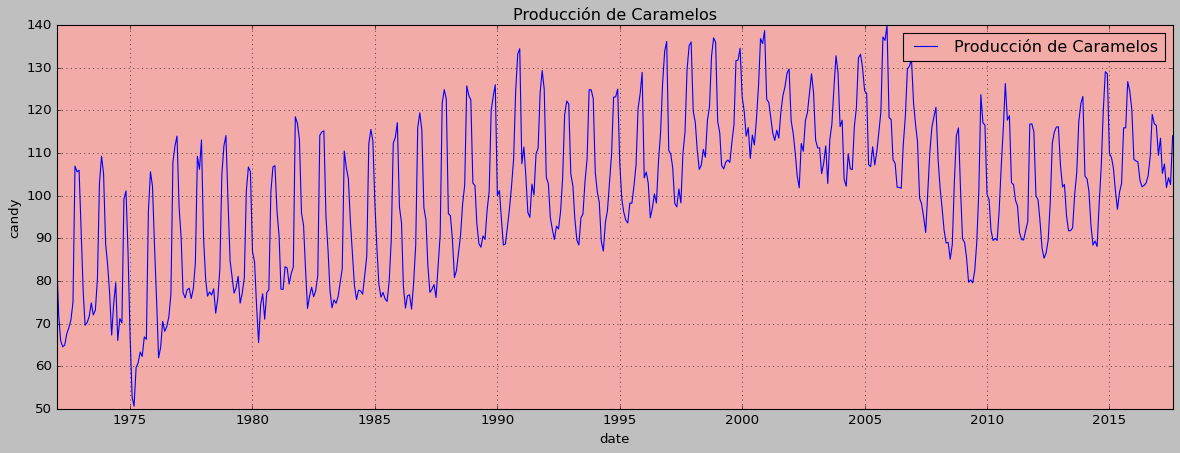

In [9]:
plt.figure(figsize=(18,6))
sns.lineplot(data = df, x  = df["date"], y = "candy", label = "Producción de Caramelos")
plt.title("Producción de Caramelos")
plt.legend()
plt.grid()
plt.show()

Hacemos la prueba de `Dickey-Fuller` para probar estacionalidad

In [10]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05: # P - Values
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")
        

In [11]:
Augmented_Dickey_Fuller_Test_func(df["candy"],"Candy")

Resultados de la prueba de Dickey-Fuller para columna: Candy
Test Statistic                         -1.887050
p-value                                 0.338178
No Lags Used                           14.000000
Número de observaciones utilizadas    533.000000
Critical Value (1%)                    -3.442678
Critical Value (5%)                    -2.866978
Critical Value (10%)                   -2.569666
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


Dado que el valor $P-valor = 0.338178$ es mayor que el nivel de significancia, tenemos que diferenciar la serie y veremos cómo se ve el gráfico de autocorrelación.

En esta ocasión haremos dos diferencia para revisar como nos da autocorrelación y luego volver a realizar la **Prueba Dickey-Fuller**.

Vamos a usar la función `diff()`

In [12]:
df["candy"].diff() # diferenciamos la serie de tiempo

0          NaN
1     -13.8745
2      -5.7971
3      -1.4584
4       0.4455
        ...   
543     2.2043
544    -5.5079
545     2.2813
546    -1.6161
547    11.4752
Name: candy, Length: 548, dtype: float64

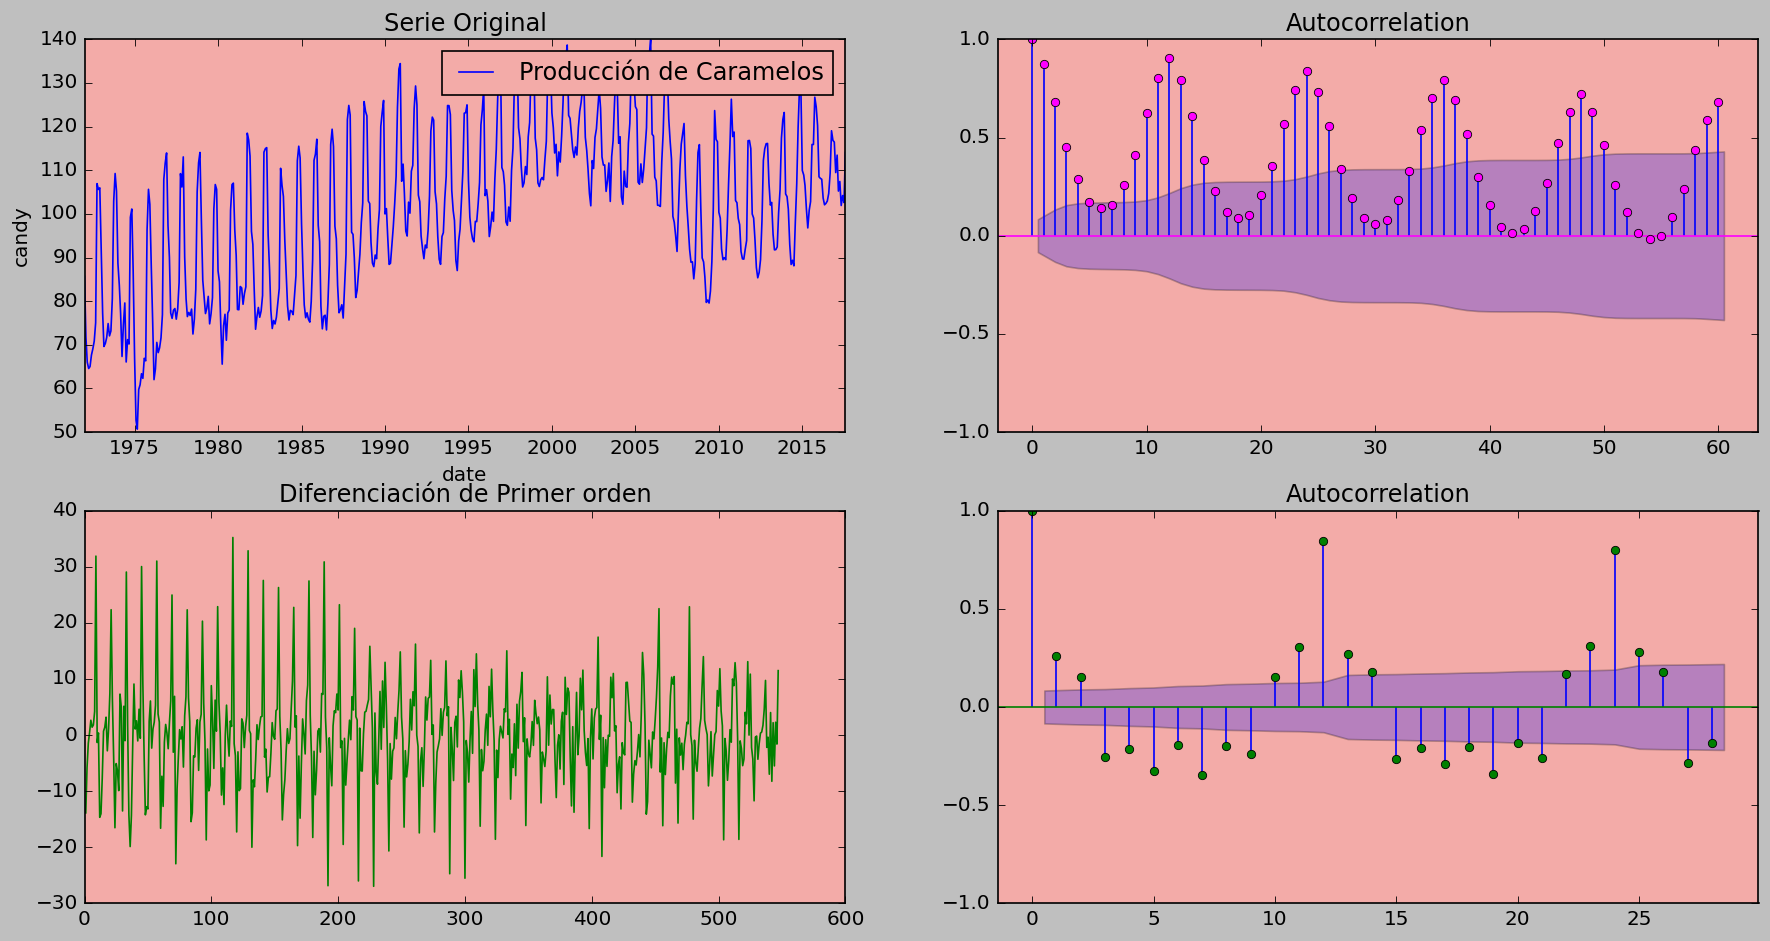

In [13]:
plt.rcParams.update({'figure.figsize':(18,9), 'figure.dpi':120})
fig, axs = plt.subplots(nrows = 2, ncols=2)

sns.lineplot(data = df, x  = df["date"], y = "candy", label = "Producción de Caramelos", ax = axs[0,0]).set_title('Serie Original')
plot_acf(df["candy"],  lags=60, ax=axs[0,1],color="fuchsia")
axs[0,1].set_title("Autocorrelation");

# Grafico
#plot_pacf(df["candy"],  lags=60, ax=axs[0,1],color="lime")
#axs[0,1].set_title('Partial Autocorrelation')


# Primera diferenciación 
axs[1, 0].plot(df["candy"].diff(), color="g"); axs[1, 0].set_title("Diferenciación de Primer orden")
plot_acf(df["candy"].diff().dropna(), ax = axs[1, 1],color="g")

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

Para la serie anterior, la serie temporal alcanza `la estacionariedad con un órdenes de diferenciación`. 

Por lo tanto, vamos a fijar provisionalmente el orden de diferenciación como 1 aunque la serie no sea perfectamente estacionaria (estacionariedad débil).

Ahora probaremos nuevamente la prueba Dickey-Fuller para la primera diferenciación.

In [14]:
df["candy"].diff()

0          NaN
1     -13.8745
2      -5.7971
3      -1.4584
4       0.4455
        ...   
543     2.2043
544    -5.5079
545     2.2813
546    -1.6161
547    11.4752
Name: candy, Length: 548, dtype: float64

In [15]:
Augmented_Dickey_Fuller_Test_func(df["candy"].diff().dropna(),"Candy")

Resultados de la prueba de Dickey-Fuller para columna: Candy
Test Statistic                       -6.119512e+00
p-value                               8.925584e-08
No Lags Used                          1.300000e+01
Número de observaciones utilizadas    5.330000e+02
Critical Value (1%)                  -3.442678e+00
Critical Value (5%)                  -2.866978e+00
Critical Value (10%)                 -2.569666e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


El Termino `I = Integrado` encontrado para el modelo `ARIMA` es:

- El valor de $d=1$

## **6. Cómo encontrar el orden del término AR (p)**
El siguiente paso es identificar si el modelo necesita algún término de AR. Puede averiguar el número requerido de términos AR inspeccionando el:

- `Gráfico de Autocorrelación parcial (PACF)`.

Pero, ¿qué es PACF?

La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, PACF transmite la correlación pura entre un retraso y la serie. De esa manera, sabrá si ese retraso es necesario en el plazo de AR o no.

Entonces, ¿cuál es matemáticamente la fórmula para PACF?

La autocorrelación parcial del rezago (k) de una serie es el coeficiente de ese rezago en la ecuación de autorregresión de Y.

$$Y_t=\alpha_0+\alpha_1 Y_{t-1}+\alpha_2 Y_{t-2}+\alpha_3 Y_{t-3}$$

Es decir, suponga que si $Y_t$ es la serie actual y $Y_{t-1}$ es el rezago 1 de $Y$, entonces la autocorrelación parcial del rezago 3 ($Y_{t-3} $ ) es el coeficiente $\alpha_3 $ de en la ecuación anterior $Y_{t-3}$

Bien. Ahora, ¿cómo encontrar el número de términos AR?

Cualquier autocorrelación en una serie estacionaria se puede rectificar agregando suficientes términos AR. Entonces, inicialmente tomamos el orden del término AR como igual a tantos rezagos que cruzan el límite de significancia en la gráfica PACF.

Puede observar que el retraso PACF 1 es bastante significativo ya que está muy por encima de la línea de importancia. El retardo 2 y 3 también resulta significativo, logrando cruzar levemente el límite de significancia (región azul). Pero voy a ser conservador y tentativamente fijaré la p como 1.

In [16]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

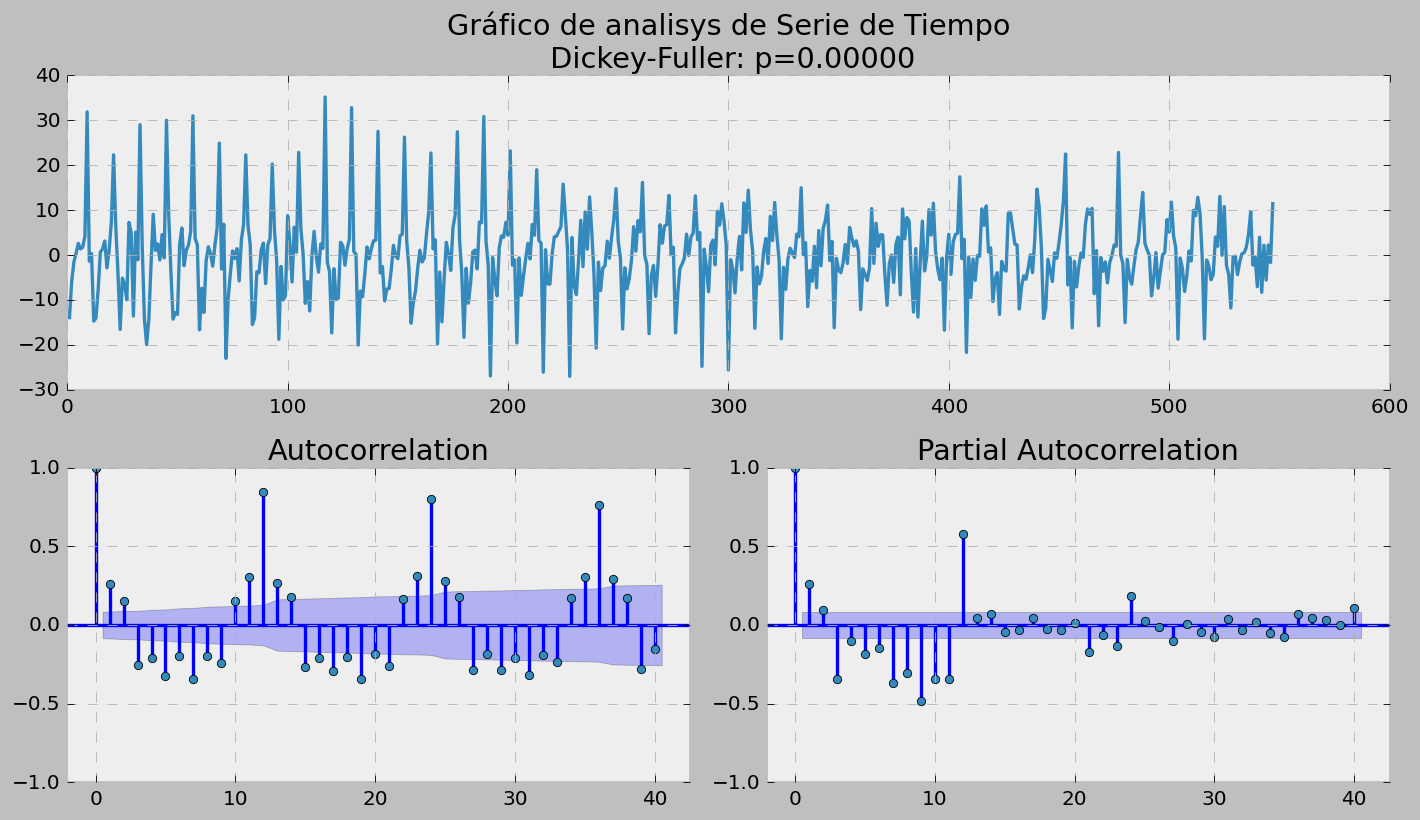

In [17]:
tsplot(df["candy"].diff().dropna(), lags = 40);

La cantindad terminos seria `lags = 10` como máximo


$$Y_t=\alpha_0+\alpha_1 Y_{t-1}+\alpha_2 Y_{t-2}+\alpha_3 Y_{t-3}, ..., \alpha_{10} Y_{t-10} $$

## **7. Cómo encontrar el orden del término MA (q)**
De la misma forma que observamos el gráfico PACF para el número de términos AR, para determinar el ordenr del Promedio Movil (MA) 

- `Gráfico ACF para el número de términos MA`. 

Un término MA es técnicamente el error del pronóstico retrasado.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.

Veamos el gráfico de autocorrelación de la serie diferenciada.

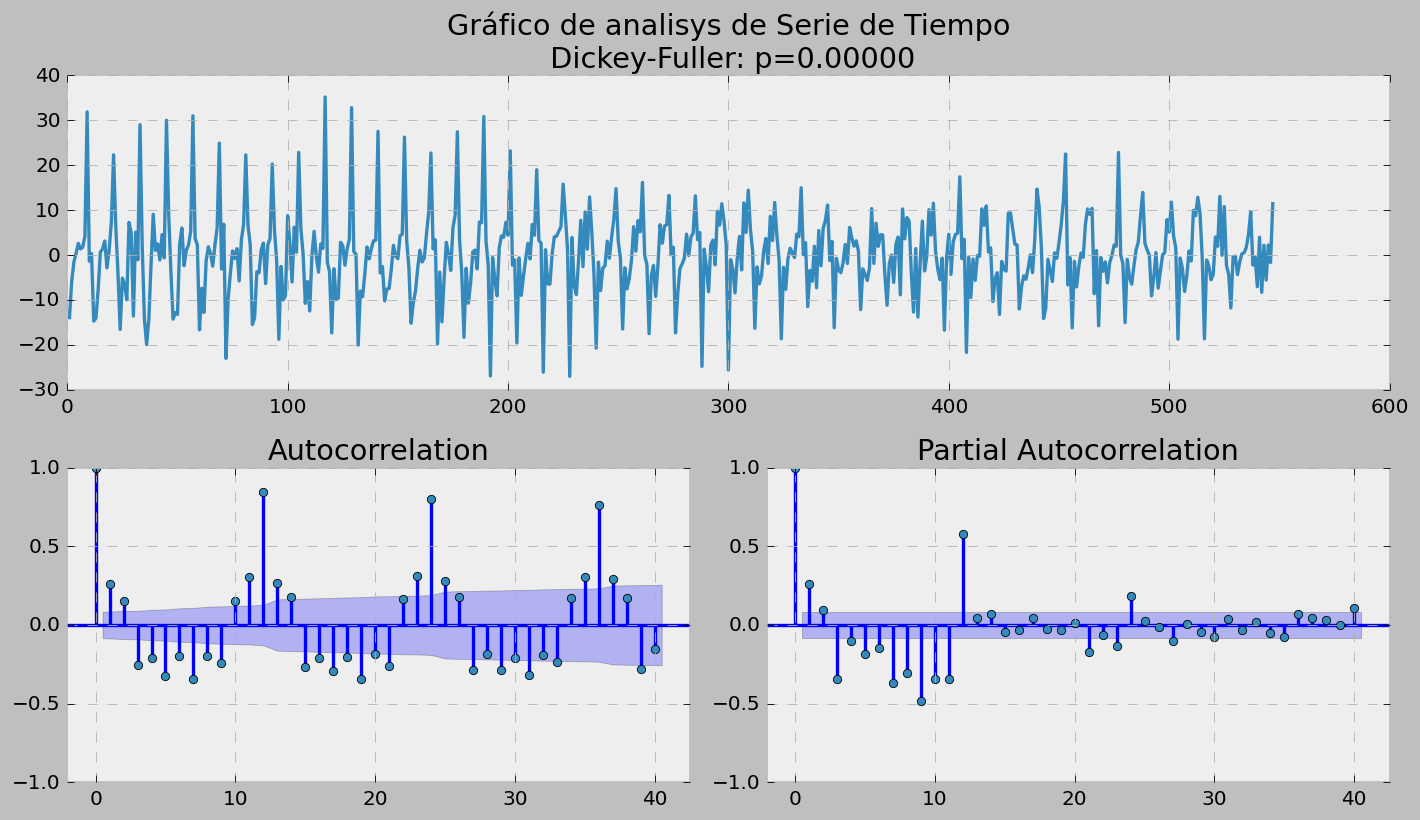

In [18]:
tsplot(df["candy"].diff().dropna(), lags = 40);

Un par de retrasos están muy por encima de la línea de importancia. Entonces, fijemos tentativamente q como 1. En caso de duda, opte por el modelo más simple que explique suficientemente la Y.

## **8. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia**
Puede suceder que su serie esté ligeramente subdiferenciada, que diferenciarla una vez más la haga ligeramente sobrediferenciada.

¿Cómo manejar este caso?

Si su serie está ligeramente por debajo de la diferencia, agregar uno o más términos AR adicionales generalmente lo compensa. Del mismo modo, si está ligeramente sobrediferenciado, intente agregar un término MA adicional.

## **9. Cómo construir el modelo ARIMA**
Ahora que ha determinado los valores de p, d y q, tiene todo lo necesario para ajustarse al modelo ARIMA. Usemos la implementación en package `ARIMA()statsmodels`

In [19]:
df.isnull().sum()

date     0
candy    0
dtype: int64

In [20]:
df=df.dropna()

# Construir nuestro primer Modelo ARIMA

In [21]:
df.head()

,date,candy
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


- Vamos a aplicar un modelo `ARIMA(1,1,1)`

In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model1 = ARIMA(df["candy"].values, order=(1,1,1))  # Parámetros: p=1, d=1, q=1

# Entrenamos el modelo
model_fit1 = model1.fit()

# Danos un resumen del Modelo
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  548
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1959.605
Date:                Mon, 30 Sep 2024   AIC                           3925.210
Time:                        06:56:03   BIC                           3938.124
Sample:                             0   HQIC                          3930.258
                                - 548                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3526      0.189      1.869      0.062      -0.017       0.722
ma.L1         -0.0958      0.204     -0.470      0.638      -0.495       0.304
sigma2        75.7094      3.215     23.547      0.000      69.407      82.011
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               128.54
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$ \Delta y_t =  0.3526 \Delta y_{t-1} -0.0958 \epsilon_{t-1} + \epsilon_{t} $$

donde 

$$\epsilon_{t} \sim N(0, 75.7094)

El resumen del modelo revela mucha información. La tabla en el medio es la tabla de coeficientes, el `coef = 0` son los pesos de los términos respectivos.

Interpretación de los diferentes elementos de la tabla:

- **ar.L1 (Autoregressive Lag 1):**
  - Coeficiente: 0.3526
  - Error estándar: 0.189
  - Valor z: 1.869
  - P>|z|: 0.062
  - Intervalo de confianza del 95%: [-0.017, 0.722]
  - Interpretación: El coeficiente AR (autoregresivo) para el lag 1 es 0.3526. Dado que el valor p (P>|z|) es 0.062, este coeficiente puede no ser estadísticamente significativo a un nivel de significancia del 5%.

- **ma.L1 (Moving Average Lag 1):**
  - Coeficiente: -0.0958
  - Error estándar: 0.204
  - Valor z: -0.470
  - P>|z|: 0.638
  - Intervalo de confianza del 95%: [-0.495, 0.304]
  - Interpretación: El coeficiente MA (media móvil) para el lag 1 es -0.0958. Dado que el valor p es alto (0.638), este coeficiente no parece ser significativo para predecir la serie.

- **sigma2 (Varianza del Error):**
  - Valor estimado: 75.7094
  - Error estándar: 3.215
  - Valor z: 23.547
  - P>|z|: 0.000
  - Intervalo de confianza del 95%: [69.407, 82.011]
  - Interpretación: La varianza del error estimada es 75.7094. El valor p muy bajo (0.000) indica que este valor es altamente significativo y que el modelo ARIMA es capaz de explicar una cantidad significativa de la variabilidad en los datos.

En resumen, al interpretar los resultados de un modelo ARIMA, es crucial prestar atención a los coeficientes, sus valores z, los valores p asociados y los intervalos de confianza para determinar la significancia estadística de los términos del modelo. Estos resultados ayudan a evaluar la calidad y la idoneidad del modelo ajustado para predecir la serie temporal en cuestión.

In [24]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model_fit1.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,120.274168,4.451598e-21


Con la prueba de `Ljung-Box`, una prueba de autocorrelación en series temporales que evalúa si hay correlación en rezagos múltiples de una serie de tiempo. Aquí está una interpretación de los resultados dados:

- **lb_stat**: El valor de `lb_stat` (120.274168) es la estadística de prueba obtenida al realizar la prueba de Ljung-Box. Esta estadística se utiliza para evaluar si hay autocorrelación significativa en la serie temporal en varios rezagos.

- **lb_pvalue**: El valor de `lb_pvalue` (4.451598e-21 o aproximadamente 0.00000009277) es el p-valor asociado con la estadística de prueba. En el contexto de la prueba de Ljung-Box, este p-valor se utiliza para determinar si la autocorrelación en la serie de tiempo hasta el rezago especificado es estadísticamente significativa.

Dado que el valor del p-valor es muy bajo (9.277121e-08 o aproximadamente 0.00000009277), esto sugiere que existe una autocorrelación significativa en la serie temporal hasta el rezago 10. En otras palabras, hay evidencia estadística para rechazar la hipótesis nula de no autocorrelación en los primeros 10 rezagos de la serie temporal.

En resumen, los resultados indican que la serie temporal exhibe autocorrelación significativa hasta el rezago 10, según la prueba de Ljung-Box realizada.

Recordemos la prueba de **Ljung-Box**

<center>
    <img src="https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/main/imagen/Prueba_Ljung-Box.JPG" width="600" height="300" />
</center>

Los errores residuales parecen estar bien con una media cercana a cero y una varianza uniforme. Grafiquemos los valores reales contra los valores ajustados usando `.plot_predict()`

In [25]:
# Realizar predicciones con el modelo ajustado
fcst1 = model_fit1.forecast(steps = 24, alpha = 0.05)
fcst1

array([116.97177997, 117.99788064, 118.3596363 , 118.48717462,
       118.53213873, 118.547991  , 118.55357978, 118.55555012,
       118.55624477, 118.55648968, 118.55657602, 118.55660646,
       118.55661719, 118.55662097, 118.55662231, 118.55662278,
       118.55662294, 118.556623  , 118.55662302, 118.55662303,
       118.55662303, 118.55662303, 118.55662303, 118.55662303])

In [26]:
# Obtener predicciones con intervalo de confianza al 95%
forecast1 = model_fit1.get_forecast(steps = 24)
forecast_values = forecast1.predicted_mean
confidence_int = forecast1.conf_int(alpha=0.05)  # Intervalo de confianza al 95%

# Imprimir las predicciones y los intervalos de confianza
print(f'Predicciones de los próximos 10 pasos: {forecast_values}')
print('Intervalo de confianza al 95%:')
print(confidence_int)

Predicciones de los próximos 10 pasos: [116.97177997 117.99788064 118.3596363  118.48717462 118.53213873
 118.547991   118.55357978 118.55555012 118.55624477 118.55648968
 118.55657602 118.55660646 118.55661719 118.55662097 118.55662231
 118.55662278 118.55662294 118.556623   118.55662302 118.55662303
 118.55662303 118.55662303 118.55662303 118.55662303]
Intervalo de confianza al 95%:
[[ 99.91791013 134.0256498 ]
 [ 90.60860197 145.38715931]
 [ 82.60969577 154.10957683]
 [ 75.69410537 161.28024386]
 [ 69.6087584  167.45551906]
 [ 64.15166899 172.94431301]
 [ 59.17717657 177.92998298]
 [ 54.58246998 182.52863026]
 [ 50.29429437 186.81819518]
 [ 46.25930759 190.85367176]
 [ 42.43766412 194.67548792]
 [ 38.79884102 198.31437189]
 [ 35.31891102 201.79432335]
 [ 31.97873074 205.1345112 ]
 [ 28.76270995 208.35053466]
 [ 25.65795534 211.45529021]
 [ 22.65366073 214.45958515]
 [ 19.74066315 217.37258285]
 [ 16.9111131  220.20213294]
 [ 14.15822527 222.95502078]
 [ 11.47608688 225.63715918]
 [ 

In [27]:
Y_hat1 = pd.DataFrame( confidence_int, columns=([ "low", "high"]))
Y_hat1["pred"] = fcst1
Y_hat1["fecha"] = pd.date_range(start='2016-09-01', periods= 24, freq='MS')
Y_hat1 = Y_hat1.set_index("fecha")
Y_hat1

,low,high,pred
fecha,,,
2016-09-01,99.917910,134.025650,116.971780
2016-10-01,90.608602,145.387159,117.997881
2016-11-01,82.609696,154.109577,118.359636
2016-12-01,75.694105,161.280244,118.487175
2017-01-01,69.608758,167.455519,118.532139
2017-02-01,64.151669,172.944313,118.547991
2017-03-01,59.177177,177.929983,118.553580
2017-04-01,54.582470,182.528630,118.555550
2017-05-01,50.294294,186.818195,118.556245


In [28]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#f3f3af"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

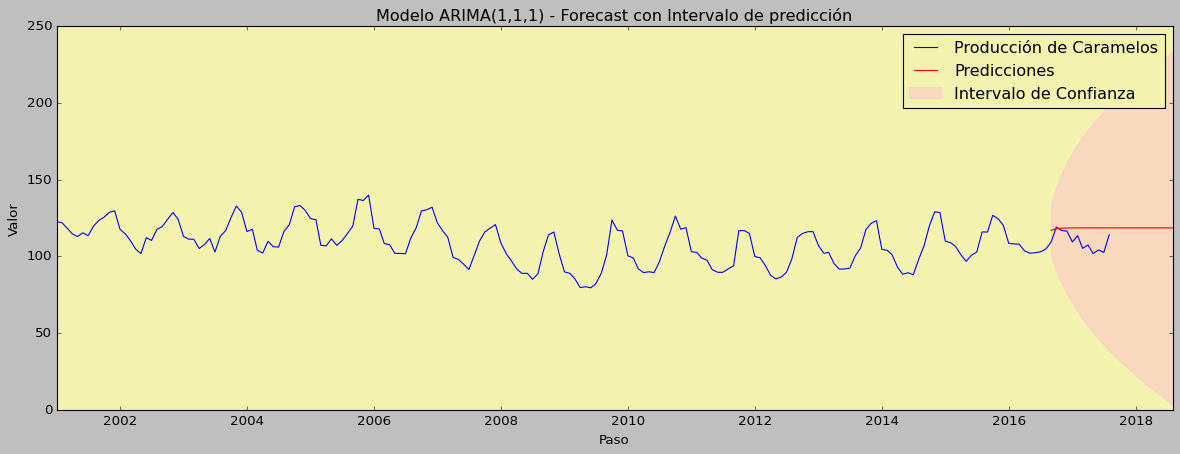

In [29]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = df.tail(200), x  = df["date"], y = "candy", label = "Producción de Caramelos")
plt.plot(Y_hat1['pred'], label='Predicciones', color = 'red')
plt.fill_between(Y_hat1.index, Y_hat1['low'], Y_hat1['high'], color='pink', alpha=0.5, label='Intervalo de Confianza')
plt.xlabel('Paso')
plt.ylabel('Valor')
plt.title('Modelo ARIMA(1,1,1) - Forecast con Intervalo de predicción')
plt.legend()
plt.show()

# Division de los Datos

- Datos de entrenamiento 
- Datos de prueba

Como nuestros datos son mensuales, vamos a usar los 12 últimos valores para probar el modelo

In [30]:
df.head()

,date,candy
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [31]:
train = df.loc[df['date'] <= '2016-08-01']
test = df.loc[df['date'] > '2016-08-01']

train.shape, test.shape

((536, 2), (12, 2))

In [32]:
train 

,date,candy
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
...,...,...
531,2016-04-01,103.6179
532,2016-05-01,102.0816
533,2016-06-01,102.4044
534,2016-07-01,102.9512


In [33]:
test

,date,candy
536,2016-09-01,109.3191
537,2016-10-01,119.0502
538,2016-11-01,116.8431
539,2016-12-01,116.4535
540,2017-01-01,109.4666
541,2017-02-01,113.4661
542,2017-03-01,105.2245
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022


Ahora puede construir el modelo ARIMA en el conjunto de datos de entrenamiento, pronosticarlo y trazarlo.

# Modelo 2

In [34]:
from statsmodels.tsa.stattools import acf

from statsmodels.tsa.arima.model import ARIMA

In [35]:
# Build Model
model_2 = ARIMA(train["candy"].values, order = (3, 1, 3))  # p = 3, d = 1, q = 3
fitted2 = model_2.fit() 

In [36]:
print(fitted2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  536
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1737.618
Date:                Mon, 30 Sep 2024   AIC                           3489.235
Time:                        06:56:25   BIC                           3519.211
Sample:                             0   HQIC                          3500.963
                                - 536                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6918      0.014     50.405      0.000       0.665       0.719
ar.L2          0.7377      0.009     85.405      0.000       0.721       0.755
ar.L3         -0.9536      0.014    -69.200      0.0

In [37]:
# Realizar predicciones con el modelo ajustado
forecast2 = fitted2.forecast(steps = 24, alpha = 0.05)
forecast2

array([106.93852706, 112.8371383 , 112.50829   , 114.4956314 ,
       110.00316659, 108.67499151, 102.54685648, 101.61142912,
        97.70986304, 100.16423422,  99.87583538, 105.20738908,
       106.34259204, 111.33620369, 110.54428147, 112.59790237,
       108.67263897, 108.22732072, 103.06518779, 102.90849125,
        99.41644339, 101.80747093, 101.03479715, 105.59409717])

In [38]:
# Obtener predicciones con intervalo de confianza al 95%
forecast = fitted2.get_forecast(steps = 24)
forecast_values = forecast.predicted_mean
confidence_int = forecast.conf_int(alpha=0.05)  # Intervalo de confianza al 95%

# Imprimir las predicciones y los intervalos de confianza
print(f'Predicciones de los próximos 10 pasos: {forecast_values}')
print('Intervalo de confianza al 95%:')
print(confidence_int)

Predicciones de los próximos 10 pasos: [106.93852706 112.8371383  112.50829    114.4956314  110.00316659
 108.67499151 102.54685648 101.61142912  97.70986304 100.16423422
  99.87583538 105.20738908 106.34259204 111.33620369 110.54428147
 112.59790237 108.67263897 108.22732072 103.06518779 102.90849125
  99.41644339 101.80747093 101.03479715 105.59409717]
Intervalo de confianza al 95%:
[[ 94.8044935  119.07256063]
 [ 96.49951814 129.17475845]
 [ 94.14390101 130.872679  ]
 [ 95.48493243 133.50633036]
 [ 90.91043133 129.09590184]
 [ 89.57475724 127.77522579]
 [ 83.4126521  121.68106087]
 [ 82.47550884 120.7473494 ]
 [ 78.45849598 116.96123009]
 [ 80.28244793 120.04602051]
 [ 78.50174848 121.24992228]
 [ 81.73611479 128.67866336]
 [ 80.68086532 132.00431876]
 [ 83.98558234 138.68682504]
 [ 82.16682594 138.92173701]
 [ 83.79466771 141.40113704]
 [ 79.75370335 137.59157459]
 [ 79.29654917 137.15809226]
 [ 74.13183115 131.99854443]
 [ 73.95692674 131.86005575]
 [ 70.32792251 128.50496427]
 [ 

In [39]:
Y_hat2 = pd.DataFrame( confidence_int, columns=([ "low", "high"]))
Y_hat2["pred"] = forecast2
Y_hat2["fecha"] = pd.date_range(start='2016-09-01', periods= 24, freq='MS')
Y_hat2 = Y_hat2.set_index("fecha")
Y_hat2

,low,high,pred
fecha,,,
2016-09-01,94.804493,119.072561,106.938527
2016-10-01,96.499518,129.174758,112.837138
2016-11-01,94.143901,130.872679,112.508290
2016-12-01,95.484932,133.506330,114.495631
2017-01-01,90.910431,129.095902,110.003167
2017-02-01,89.574757,127.775226,108.674992
2017-03-01,83.412652,121.681061,102.546856
2017-04-01,82.475509,120.747349,101.611429
2017-05-01,78.458496,116.961230,97.709863


In [40]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#abc9ea"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

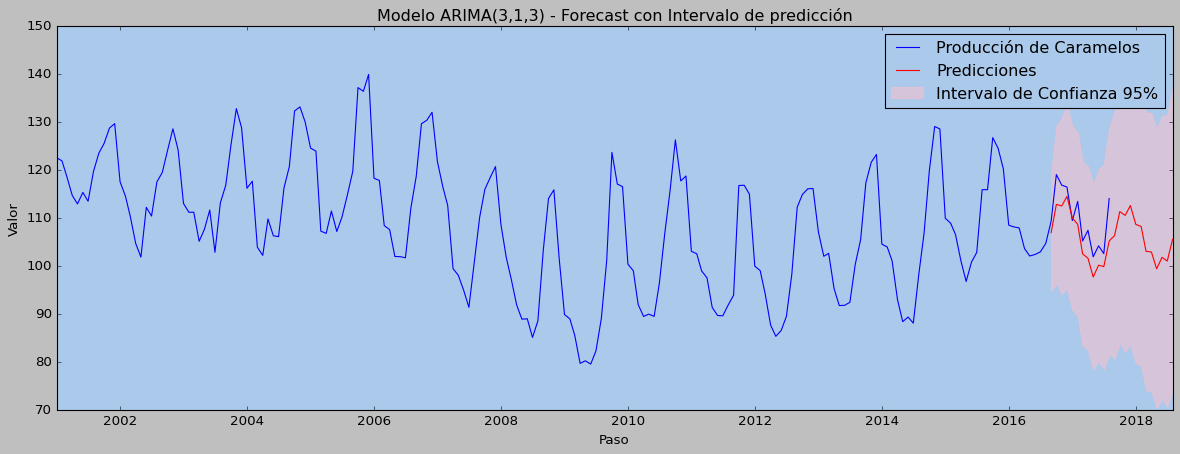

In [41]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = df.tail(200), x  = df["date"], y = "candy", label = "Producción de Caramelos")
plt.plot(Y_hat2['pred'], label='Predicciones', color = 'red')
plt.fill_between(Y_hat2.index, Y_hat2['low'], Y_hat2['high'], color='pink', alpha=0.5, label='Intervalo de Confianza 95%')
plt.xlabel('Paso')
plt.ylabel('Valor')
plt.title('Modelo ARIMA(3,1,3) - Forecast con Intervalo de predicción')
plt.legend()
plt.show()

A partir del gráfico, el modelo ARIMA (3,1,3) parece dar un pronóstico bastante acertado. Y los valores reales observados se encuentran dentro de la banda de confianza del 95%. Eso parece estar bien.

# Modelo 3

In [ ]:
tsplot(df["candy"].diff().dropna(), lags = 40);

In [ ]:
# Build Model
model_3 = ARIMA(df["candy"].values, order=(5, 1, 5))  # p = 5, d = 1, q = 5
fitted3 = model_3.fit()  
print(fitted3.summary())

In [ ]:
# Realizar predicciones con el modelo ajustado
fcst3 = fitted3.forecast(steps = 24, alpha = 0.05)
fcst3

In [ ]:
# Obtener predicciones con intervalo de confianza al 95%
forecast3 = fitted3.get_forecast(steps = 24)
forecast_values3 = forecast3.predicted_mean
confidence_int3 = forecast3.conf_int(alpha=0.05)  # Intervalo de confianza al 95%

# Imprimir las predicciones y los intervalos de confianza
print(f'Predicciones de los próximos 15 pasos: {forecast_values3}')
print('Intervalo de confianza al 95%:')
print(confidence_int3)

In [ ]:
Y_hat3 = pd.DataFrame( confidence_int3, columns=([ "low", "high"]))
Y_hat3["pred"] = fcst3
Y_hat3["fecha"] = pd.date_range(start='2016-09-01', periods= 24, freq='MS')
Y_hat3 = Y_hat3.set_index("fecha")
Y_hat3

In [ ]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = df.tail(100), x  = df["date"], y = "candy", label = "Producción de Caramelos")
plt.plot(Y_hat3['pred'], label='Predicciones', color='green', linewidth=2,)
plt.fill_between(Y_hat3.index, Y_hat3['low'], Y_hat3['high'], color='pink', alpha=0.5, label='Intervalo de Confianza 95%')
plt.xlabel('Paso')
plt.ylabel('Valor')
plt.title('Modelo ARIMA(5,1,5) - Forecast con Intervalo de predicción')
plt.legend()
plt.show()

El AIC del modelo 3 a aumentado, paso de  3489.235 a 3540.348 

# Modelo 4

In [ ]:
# Build Model
model_4 = ARIMA(df["candy"].values, order=(12, 1, 12))  
fitted4 = model_4.fit()  
print(fitted4.summary())

In [ ]:
# Realizar predicciones con el modelo ajustado
fcst4 = fitted4.forecast(steps = 24, alpha = 0.05)
fcst4

In [ ]:
# Obtener predicciones con intervalo de confianza al 95%
forecast4 = fitted4.get_forecast(steps = 24)
forecast_values4 = forecast4.predicted_mean
confidence_int4 = forecast4.conf_int(alpha=0.05)  # Intervalo de confianza al 95%

# Imprimir las predicciones y los intervalos de confianza
print(f'Predicciones de los próximos 15 pasos: {forecast_values4}')
print('Intervalo de confianza al 95%:')
print(confidence_int4)

In [ ]:
Y_hat4 = pd.DataFrame( confidence_int4, columns=([ "low", "high"]))
Y_hat4["pred"] = fcst4
Y_hat4["fecha"] = pd.date_range(start='2016-09-01', periods= 24, freq='MS')
Y_hat4 = Y_hat4.set_index("fecha")
Y_hat4

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#98daa7"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [ ]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = df.tail(100), x  = df["date"], y = "candy", label = "Producción de Caramelos")
plt.plot(Y_hat4['pred'], label='Predicciones', color = 'red', linewidth = 1.5,)
plt.fill_between(Y_hat4.index, Y_hat4['low'], Y_hat4['high'], color='pink', alpha=0.5, label='Intervalo de Confianza 95%')
plt.xlabel('Paso')
plt.ylabel('Valor')
plt.title('Modelo ARIMA(12,1,12) - Forecast con Intervalo de predicción')
plt.legend()
plt.show()

## **10. Métricas de precisión para el pronóstico de series de tiempo**
Las métricas de precisión comúnmente utilizadas para juzgar los pronósticos son:

* Error de porcentaje absoluto medio (MAPE)
* Error medio (ME)
* Error absoluto medio (MAE)
* Error de porcentaje medio (MPE)
* Error cuadrático medio (RMSE)
* Autocorrelación de error con retraso 1 (ACF1)
* Correlación entre el real y el pronóstico (corr)
* Error mínimo-máximo (minmax)

Por lo general, si está comparando pronósticos de dos series diferentes, se pueden usar MAPE, Correlación y Error Mín-Máx.

¿Por qué no utilizar las otras métricas?

Debido a que solo los tres anteriores son errores porcentuales que varían entre 0 y 1. De esa manera, puede juzgar qué tan bueno es el pronóstico independientemente de la escala de la serie.

Las otras métricas de error son cantidades. Eso implica que un RMSE de 100 para una serie cuya media está en 1000 es mejor que un RMSE de 5 para una serie en decenas. Por lo tanto, realmente no puede usarlos para comparar los pronósticos de dos series de tiempo escaladas diferentes.

In [ ]:
from sklearn import metrics

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Resultado de evaluación de la Metrica:-')
    print(f'MSE es : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE es : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE es : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE es : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 es : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
test

In [ ]:
Y_hat4["pred"][:12]

In [ ]:
timeseries_evaluation_metrics_func(test["candy"], Y_hat4["pred"][:12])

* Cuando se menciona un "MAPE" (Mean Absolute Percentage Error) de 3.26 en el contexto de un modelo ARIMA (Autoregressive Integrated Moving Average), significa que el error porcentual promedio absoluto en las predicciones del modelo es del 3.26%. El MAPE se utiliza comúnmente para evaluar la precisión de un modelo de pronóstico, ya que proporciona una medida relativa de la precisión de las predicciones en términos porcentuales.

* Interpretar un MAPE de 3.26% implica que, en promedio, las predicciones del modelo ARIMA están desviadas en un 3.26% en comparación con los valores reales de la serie temporal que se está modelando. Un MAPE más bajo indica una mejor precisión en las predicciones del modelo, mientras que un MAPE más alto sugiere una menor precisión.

En resumen, un MAPE del 3.26% en un modelo ARIMA indica que las predicciones tienen un error promedio absoluto del 3.26% en relación con los valores reales, lo que puede considerarse como un nivel aceptable de precisión dependiendo del contexto y de las expectativas de precisión del modelo.

### `Ahora sabe cómo construir un modelo ARIMA manualmente!!!`

## **11. Cómo modelar un Modelo ARIMA con AutoArima**
El paquete proporciona la función `auto.arima()` del paquete `pmdarimaauto_arima()`

`auto_arima()` utiliza un enfoque paso a paso para buscar múltiples combinaciones de parámetros p, d, q y elige el mejor modelo que tiene el menor AIC.

In [ ]:
from pmdarima import auto_arima

In [ ]:
model_auto = auto_arima(train["candy"].values, start_p = 1, start_q = 1, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p = 12, max_q = 12, # maximum p and q
                      d = 1,
                      m = 12,              # frequency of series
                      seasonal = True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise = True)

print(model_auto.summary())

### **Cómo interpretar las gráficas de residuos en el modelo ARIMA**
Repasemos las gráficas de residuos usando stepwise_fit.

In [ ]:
model_auto.plot_diagnostics(figsize=(18,8))
plt.show()

Entonces, ¿cómo interpretar los diagnósticos de la trama?

Arriba a la izquierda: los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.

Arriba a la derecha: la gráfica de densidad sugiere una distribución normal con media cero.

Abajo a la izquierda: todos los puntos deben estar perfectamente alineados con la línea roja. Cualquier desviación significativa implicaría que la distribución está sesgada.

Abajo a la derecha: el correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. Cualquier autocorrelación implicaría que existe algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, deberá buscar más X (predictores) en el modelo.

En general, parece encajar bien. Pronostiquemos.

In [ ]:
# Obtener predicciones con intervalo de confianza al 95%
forecast_auto = model_auto.predict(n_periods = 24, return_conf_int=True)
forecast_values = forecast_auto[0]
confidence_int = forecast_auto[1]

In [ ]:
forecast_auto[0]

In [ ]:
forecast_auto[1]

In [ ]:
Y_auto = pd.DataFrame( forecast_auto[1], columns=([ "low", "high"]))
Y_auto["pred"] = forecast_auto[0]
Y_auto["fecha"] = pd.date_range(start='2024-12-01', periods= 24, freq='MS')
Y_auto = Y_auto.set_index("fecha")
Y_auto

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#f3aba8"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [ ]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = train.tail(200), x  = train.index, y = "candy", label = "Producción de Caramelos")
plt.plot(Y_auto['pred'], label='Predicciones', color = 'black', linewidth = 1.5)
plt.fill_between(Y_auto.index, Y_auto['low'], Y_auto['high'], color = 'green', alpha=0.5, label='Intervalo de Confianza')
plt.xlabel('Fecha')
plt.ylabel('')
plt.title('Modelo ARIMA(12,1,3) - Forecast con Intervalo de predicción')
plt.legend()
plt.show()

## **12. Cómo construir automáticamente el modelo SARIMA**
El problema con el modelo ARIMA simple es que no admite la estacionalidad.

Si su serie temporal tiene una estacionalidad definida, elija SARIMA, que utiliza la diferenciación estacional.

La diferenciación estacional es similar a la diferenciación regular, pero, en lugar de restar términos consecutivos, resta el valor de la temporada anterior.

Entonces, el modelo se representará como SARIMA (p, d, q) x (P, D, Q), donde, P, D y Q son SAR, orden de diferenciación estacional y términos SMA respectivamente y 'x'es la frecuencia del tiempo. serie.

Si su modelo tiene patrones estacionales bien definidos, aplique D = 1 para una frecuencia determinada 'x'.

Aquí hay algunos consejos prácticos sobre la construcción del modelo SARIMA:

Como regla general, configure los parámetros del modelo de manera que D nunca exceda uno. Y la diferenciación total 'd + D' nunca excede 2. Intente mantener solo los términos SAR o SMA si su modelo tiene componentes estacionales.

Construyamos un modelo SARIMA sobre 'a10'el conjunto de datos de ventas de medicamentos.

Como puede ver claramente, los picos estacionales están intactos después de aplicar la diferenciación habitual (retraso 1). Considerando que, se rectifica después de la diferenciación estacional.

Construyamos el modelo SARIMA usando pmdarima's . Para hacer eso, debe establecer , establecer la frecuencia de las series mensuales y hacer cumplir

auto_arima()seasonal=Truem=12D=1

In [ ]:
model_auto_sarima = auto_arima(train["candy"].values, start_p=1, start_q=1, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p = 12, max_q = 12, # Maximo valores p y q
                      d = 1,
                      m = 12,              # Frecuencia de la serie
                      
                      start_P = 0, start_Q = 0,  # Terminos Estacional
                      seasonal = True,   # Estacional
                      D = 1,             # Difenciado estacional 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_auto_sarima.summary())

El modelo ha estimado el AIC y los valores P de los coeficientes parecen significativos. Veamos la gráfica de diagnóstico residual.

El mejor modelo tiene un AIC de 528,6 y los valores P son significativos.SARIMAX(3, 0, 0)x(0, 1, 1, 12)

Pronostiquemos para los próximos 24 meses.

### **12.1. Cómo interpretar las gráficas de residuos en el modelo ARIMA**
Repasemos las gráficas de residuos usando `stepwise_fit`.

In [ ]:
model_auto_sarima.plot_diagnostics(figsize=(18,8))
plt.show()

In [ ]:
# Obtener predicciones con intervalo de confianza al 95%
forecast_auto_sarima = model_auto_sarima.predict(n_periods = 24, return_conf_int=True)
forecast_values = forecast_auto_sarima[0]
confidence_int = forecast_auto_sarima[1]

In [ ]:
forecast_auto_sarima[0]

In [ ]:
Y_auto_sarima = pd.DataFrame(forecast_auto_sarima[1], columns=([ "low", "high"]))
Y_auto_sarima["pred"] = forecast_auto_sarima[0]
Y_auto_sarima["fecha"] = pd.date_range(start='2016-09-01', periods= 24, freq='MS')
Y_auto_sarima = Y_auto_sarima.set_index("fecha")
Y_auto_sarima

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#d3c3f7"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [ ]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = df.tail(200), x  = df["date"], y = "candy", label = "Producción de Caramelos", linewidth = 1.5)
plt.plot(Y_auto_sarima['pred'], label='Predicciones', color = 'black', linewidth = 1.5)
plt.fill_between(Y_auto_sarima.index, Y_auto_sarima['low'], Y_auto_sarima['high'], color = 'yellow', alpha=0.5, label='Intervalo de Confianza')
plt.xlabel('Paso')
plt.ylabel('Valor')
plt.title('Modelo SARIMA(3,1,4)(0,1,1)[12]: Forecast con Intervalo de predicción')

plt.legend()
plt.show()

Allí tiene un buen pronóstico que captura el patrón de demanda estacional esperado.

## **13. Cómo construir el modelo SARIMAX con variable exógena**
El modelo SARIMA que construimos es bueno. Normalmente me detendría aquí.

Pero en aras de la completitud, intentemos forzar un predictor externo, también llamado "variable exógena" en el modelo. Este modelo se llama modelo SARIMAX.

El único requisito para utilizar una variable exógena es también conocer el valor de la variable durante el período de pronóstico.

En aras de la demostración, voy a utilizar el índice estacional de la descomposición estacional clásica en los últimos 36 meses de datos.

¿Por qué el índice estacional? ¿No está SARIMA ya modelando la estacionalidad, preguntas?

Estás en lo correcto.

Pero también, quiero ver cómo se ve el modelo si forzamos el patrón de estacionalidad reciente en el entrenamiento y el pronóstico.

En segundo lugar, esta es una buena variable para fines de demostración. Entonces puede usar esto como una plantilla y conectar cualquiera de sus variables en el código. El índice estacional es una buena variable exógena porque repite cada ciclo de frecuencia, 12 meses en este caso.

Por lo tanto, siempre sabrá qué valores tendrá el índice estacional para los pronósticos futuros.

In [ ]:
data = df.copy()
data

In [ ]:
data['3-month'] = data["candy"].rolling(window = 3, ).mean().reset_index(0, drop=True)
data['5-month'] = data["candy"].rolling(window = 5, ).mean().reset_index(0, drop=True)
data['8-month'] = data["candy"].rolling(window = 8, ).mean().reset_index(0, drop=True)
data['10-month'] = data["candy"].rolling(window = 10, ).mean().reset_index(0, drop=True)
data.dropna(inplace = True)

data

In [ ]:
train1 = data.loc[data['date'] <= '2016-08-01']
test1 = data.loc[data['date'] > '2016-08-01']

train1.shape, test1.shape

Calculemos el índice estacional para que pueda forzarse como un predictor (exógeno) del modelo SARIMAX.

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [ ]:
# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

La variable exógena (índice estacional) está lista. Construyamos el modelo SARIMAX.

In [ ]:
data.columns

In [ ]:
sarimax = auto_arima(train["candy"].values, exogenous = data[['3-month', '5-month', '8-month', '10-month']],
                     start_p=1, start_q=1, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p = 10, max_q = 10, # Maximo valores p y q
                      d = 1,
                      m = 12,              # Frecuencia de la serie
                      start_P = 0, start_Q = 0,  # Terminos Estacional
                      seasonal = True,   # Estacional
                      D = 1,             # Difenciado estacional 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

sarimax.summary()

In [ ]:
sarimax.plot_diagnostics(figsize=(18,8))
plt.show()

In [ ]:
# Obtener predicciones con intervalo de confianza al 95%
auto_sarimax = sarimax.predict(n_periods = 24, return_conf_int=True)
forecast_values = auto_sarimax[0]
confidence_int = auto_sarimax[1]

In [ ]:
auto_sarimax[0]

In [ ]:
Y_auto_sarimax = pd.DataFrame(auto_sarimax[1], columns=([ "low", "high"]))
Y_auto_sarimax["pred"] = auto_sarimax[0]
Y_auto_sarimax["fecha"] = pd.date_range(start='2016-09-01', periods= 24, freq='MS')
Y_auto_sarimax = Y_auto_sarimax.set_index("fecha")
Y_auto_sarimax

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#98daa7"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [ ]:
# Graficar los datos
plt.figure(figsize=(18, 6))
sns.lineplot(data = data.tail(200), x  = data["date"], y = "candy", label = "Producción de Caramelos", linewidth = 1.5)
plt.plot(Y_auto_sarimax['pred'], label='Predicciones', color = 'red', linewidth = 1.5)
plt.fill_between(Y_auto_sarimax.index, Y_auto_sarimax['low'], Y_auto_sarimax['high'], color = 'yellow', alpha=0.5, label='Intervalo de Confianza')
plt.xlabel('Paso')
plt.ylabel('Valor')
plt.title('Modelo SARIMAX(3,1,4)(0,1,1)[12] : Forecast con Intervalo de predicción 95%')

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'date': [
        '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
        '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
        '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
        '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
        '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
        '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
        '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
        '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
        '2017-07-01', '2017-08-01'
    ],
    'candy': [
        92.4299, 100.3593, 105.5167, 117.3458, 121.6179, 123.2412,
        104.5665, 103.9509, 101.0708, 93.0044, 88.4073, 89.3661,
        88.0949, 98.0799, 106.8675, 119.7665, 129.0619, 128.5528,
        109.9525, 108.9073, 106.5261, 101.0631, 96.7802, 100.8339,
        102.8290, 115.9030, 115.8964, 126.7440, 124.5176, 120.2374,
        108.5041, 108.1308, 107.9417, 103.6179, 102.0816, 102.4044,
        102.9512, 104.6977, 109.3191, 119.0502, 116.8431, 116.4535,
        109.4666, 113.4661, 105.2245, 107.4288, 101.9209, 104.2022,
        102.5861, 114.0613
    ]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['candy'], marker='o', color='b', linestyle='-')

# Establecer etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Dulces')
plt.title('Cantidad de Dulces a lo largo del tiempo')

# Rotar los ejes x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
df = train.copy()
df.reset_index(inplace = True)

df.head()

In [ ]:
df["rolling-5"] = df["candy"].rolling(5).mean().reset_index(0, drop=True)
df.dropna(inplace = True)
df.head()

In [ ]:
#df['5-day'] = df_alto.groupby('unique_id')['y'].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)

df['lag1'] = df["candy"].shift(1)
df['lag5'] = df["candy"].shift(5)
df['lag10'] = df["candy"].shift(10)

In [ ]:
df.dropna(inplace= True)

In [ ]:
df

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "black"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [ ]:
plt.figure(figsize = (18,6))
sns.lineplot(data = df.tail(100), x  = df["index"], y = "candy", label = "Ventas", color = "yellow", linewidth = 1.5)
#sns.lineplot(data = df.tail(100), x  = df["date"], y = "rolling-5", label = "Rolling-5",  marker='o', color = "red")
sns.lineplot(data = df.tail(100), x  = df["index"], y = "lag5", label = "lag5", color = "green", linewidth = 2.5, linestyle='--')
#sns.lineplot(data = df.tail(100), x  = df["date"], y = "lag10", label = "lag10")
plt.plot(Y_auto['pred'], label='Predicciones', color = 'red', linewidth = 1.5, marker='o')
plt.fill_between(Y_auto.index, Y_auto['low'], Y_auto['high'], color = "#F5CAC3", alpha=0.5, label='Intervalo de Confianza')
#plt.legend(loc='upper center')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, labelcolor = "white")  
plt.title("Actual vs Forecast", fontsize = 20)
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Generar datos de ventas aleatorias
np.random.seed(42)
sales_data = np.random.exponential(scale=1000, size=1000)  # Datos de ventas (distribución exponencial)

# Definir un umbral para considerar valores extremos
threshold = np.percentile(sales_data, 95)  # Umbral del percentil 95

# Filtrar valores extremos
excess_data = sales_data[sales_data > threshold] - threshold  # Excesos por encima del umbral

# Ajustar la distribución de Pareto a los excesos
shape, loc, scale = pareto.fit(excess_data)

# Calcular la probabilidad de ventas extremadamente altas
extreme_sales = threshold + 10000  # Valor extremadamente alto
prob_extreme_sales = 1 - pareto.cdf(extreme_sales - threshold, shape, loc=loc, scale=scale)

# Graficar los datos y la distribución ajustada
plt.figure(figsize=(12, 6))

plt.hist(sales_data, bins=30, color='skyblue', alpha=0.7, label='Datos de Ventas')
plt.hist(excess_data + threshold, bins=15, color='salmon', alpha=0.7, label='Excesos sobre el Umbral')

x = np.linspace(min(excess_data), max(excess_data), 100)
plt.plot(x + threshold, pareto.pdf(x, shape, loc=loc, scale=scale) * len(excess_data) * np.diff(np.unique(excess_data))[0], color='orange', label='Distribución de Pareto')

plt.axvline(extreme_sales, color='red', linestyle='--', label='Venta Extrema')

plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.title('Análisis de Valores Extremos en Ventas')
plt.legend()
plt.grid(True)
plt.show()

print(f"La probabilidad de tener una venta de al menos {extreme_sales:.2f} es: {prob_extreme_sales:.4f}")

In [ ]:
import pandas as pd
from utilsforecast.plotting import plot_series

train = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/main/Data/Electric_Production.csv", parse_dates= ["DATE"])
train = train.rename(columns ={"DATE":"ds", "Value":"y"})
train["unique_id"] = 1
train

In [ ]:
train.info()

In [ ]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
models={ 
        "LR":LinearRegression(),
        "KNN": KNeighborsRegressor(),}
    

In [ ]:
mlf = MLForecast(models = models,
    freq= "MS",
    target_transforms=[Differences([1])],
    lags=[24 * (i + 1) for i in range(7)],
)

In [ ]:
prep = mlf.preprocess(train)
prep.head()

In [ ]:
mlf.fit(
    df=train.head(300), fitted = True,
    prediction_intervals=PredictionIntervals(n_windows = 5, h=24,  method = "conformal_distribution"),
)

In [ ]:
# A list of floats with the confidence levels of the prediction intervals
levels = [50, 80, 95]

# Predict the next 48 hours
horizon = 24

# Generate forecasts with prediction intervals
forecasts = mlf.predict(h=horizon, level=levels)
forecasts

In [ ]:
test_with_forecasts = train.merge(forecasts, how="left", on=["unique_id", "ds"])
test_with_forecasts.head()

In [ ]:
test_with_forecasts.to_excel("prueba.xlsx")

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#f3f3af"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [ ]:
from utilsforecast.plotting import plot_series

levels = [ 80, 95]
fig = plot_series(
    train,
    forecasts,
    plot_random = False,
    models=["KNN"],
    level=levels,
    max_insample_length= 60,
    palette= ("Accent")  # "Pastel1"  "Accent"  "Dark2"
)
fig.set_size_inches(18, 6)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, )  

for ax in fig.get_axes():
   ax.set_title("Prediction intervals: Ventas", fontsize = 20)

# Ajustar la transparencia de los intervalos de predicción
for collection in ax.collections:
        collection.set_alpha(0.2)


fig
fig


In [ ]:
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt
import seaborn as sns

levels = [80, 95]

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("tab10",3)  # Salmón claro, verde claro
palette_tab10 = sns.color_palette("tab10", 2)

fig = plot_series(
    train,
    forecasts,
    plot_random=False,
    models=["KNN"],
    level=levels,
    max_insample_length=60,
    palette = palette_tab10 
)

fig.set_size_inches(18, 6)

for ax in fig.get_axes():
    ax.set_title("Prediction intervals: Ventas", fontsize=20)
    
    # Personalizar la leyenda
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, loc='upper left', fontsize=12)
    
    # Ajustar etiquetas de los ejes
    ax.set_xlabel('Fecha', fontsize=14)
    ax.set_ylabel('Ventas', fontsize=14)
    
    # Ajustar las etiquetas del eje x para que sean más legibles
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Ajustar la transparencia de los intervalos de predicción
    for collection in ax.collections:
        collection.set_alpha(0.3)

    for color in ax.patches:
        color.set_color("tab10", 3)

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

fig

In [ ]:
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt

# Definir los niveles de predicción
levels = [80, 95]

# Crear una paleta de colores personalizada
custom_palette = sns.color_palette("tab10", 2)

# Función para aplicar la paleta personalizada
def custom_plot_series(*args, **kwargs):
    fig = plot_series(*args, **kwargs)
    for ax in fig.get_axes():
        for level, color in custom_palette.items():
            for line in ax.get_lines():
                if f"{level}%" in line.get_label():
                    line.set_color(color)
    return fig

# Generar la figura con la paleta personalizada
fig = custom_plot_series(
    train,
    forecasts,
    plot_random=False,
    models=["KNN"],
    level=levels,
    max_insample_length=60,
    #palette = custom_palette  # Este parámetro se puede ignorar con la paleta personalizada
)

fig.set_size_inches(18, 6)

for ax in fig.get_axes():
    ax.set_title("Prediction intervals: Ventas", fontsize=20)

plt.show()
fig


In [ ]:
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt

# Definir los niveles de predicción
levels = [80, 95]

# Generar la figura sin especificar la paleta
fig = plot_series(
    train,
    forecasts,
    plot_random=False,
    models=["KNN"],
    level=levels,
    max_insample_length=60
)

fig.set_size_inches(18, 6)

# Colores personalizados para los intervalos de predicción
custom_colors = ['#008080' "#abc9ea"]

# Aplicar los colores personalizados a los intervalos de predicción
for ax in fig.get_axes():
    for i, level in enumerate(levels):
        for line in ax.get_lines():
            if f"{level}%" in line.get_label():
                line.set_color(custom_colors[i])
    ax.set_title("Prediction intervals: Ventas", fontsize=20)

fig


In [ ]:
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt

# Definir los niveles de predicción
levels = [80, 95]

# Generar la figura sin especificar la paleta
fig = plot_series(
    train,
    forecasts,
    plot_random=False,
    models=["KNN"],
    level=levels,
    max_insample_length=60
)

fig.set_size_inches(18, 6)

# Colores personalizados para los intervalos de predicción
custom_colors = ["skyblue", "lightcoral"] # ["skyblue", "lightcoral"]  ['#008080' "#abc9ea"]

# Aplicar los colores personalizados a los intervalos de predicción
for ax in fig.get_axes():
    lines = ax.get_lines()
    for i, level in enumerate(levels):
        # Cambiar el color de las líneas de predicción
        lines[i*2].set_color(custom_colors[i])  # Línea de predicción
        lines[i*2+1].set_color(custom_colors[i])  # Línea de intervalo de predicción
    ax.set_title("Prediction intervals: Ventas", fontsize=20)

plt.show()


In [ ]:
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

# Definir los niveles de predicción
levels = [80, 95]

# Generar la figura sin especificar la paleta
fig = plot_series(
    train,
    forecasts,
    plot_random=False,
    models=["KNN"],
    level=levels,
    max_insample_length=60,
    palette = "Set1"  # Este parámetro se puede ignorar si se personalizan los colores después
)

fig.set_size_inches(18, 6)

# Colores personalizados para los intervalos de predicción
custom_colors = ["blue", "brown"]

# Aplicar los colores personalizados a los intervalos de predicción
for ax in fig.get_axes():
    # Encontrar los objetos fill_between en el gráfico
    for collection in ax.collections:
        if isinstance(collection, PolyCollection):
            # Cambiar el color de los intervalos de predicción
            collection.set_facecolor(custom_colors.pop(0))
    ax.set_title("Prediction intervals: Ventas", fontsize=20)

fig


In [ ]:
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt

# Definir los niveles de predicción
levels = [80, 95]

# Generar la figura sin especificar la paleta
fig = plot_series(
    train,
    forecasts,
    plot_random=False,
    models=["KNN"],
    level=levels,
    max_insample_length=60,
    palette = "Dark2"
)

fig.set_size_inches(18, 6)

# Colores personalizados para los intervalos de predicción
custom_colors = ["blue", "black"]

# Aplicar los colores personalizados a los intervalos de predicción
for ax in fig.get_axes():
    # Encontrar los objetos fill_between en el gráfico
    for i, collection in enumerate(ax.collections):
        if isinstance(collection, PolyCollection):
            # Cambiar el color de los intervalos de predicción
            collection.set_facecolor(custom_colors[i % len(custom_colors)])
    ax.set_title("Prediction intervals: Ventas", fontsize=20)



fig


In [ ]:
import matplotlib.pyplot as plt

# Datos
ventas = [119.0166, 110.533, 98.2672, 86.3, 90.8364, 104.3538, 112.8066, 112.9014, 100.1209, 88.9251, 92.775, 114.3266]
knn = [118.0176, 110.91688, 103.37624, 92.90402, 95.01204, 102.95864, 112.40956, 112.5912, 101.88098, 93.19344, 94.33748, 109.31106]
knn_lo_95 = [109.4196235, 105.8454135, 95.8510525, 84.9155865, 84.83176, 91.4486675, 98.831535, 96.7596485, 86.9938835, 78.297076, 78.7585935, 85.9894685]
knn_hi_95 = [126.6155765, 115.9883465, 110.9014275, 100.8924535, 105.19232, 114.4686125, 125.987585, 128.4227515, 116.7680765, 108.089804, 109.9163665, 132.6326515]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las ventas reales
ax.plot(ventas, label='Ventas', color='blue', marker='o')

# Graficar las predicciones de KNN
ax.plot(knn, label='KNN', color='green', linestyle='--', marker='x')

# Graficar los intervalos de confianza
ax.fill_between(range(len(knn)), knn_lo_95, knn_hi_95, color='lightgrey', alpha=0.5, label='Intervalo de Confianza 95%')

# Añadir título y etiquetas
ax.set_title('Ventas vs Predicciones KNN')
ax.set_xlabel('Periodo')
ax.set_ylabel('Ventas')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos
ventas = [119.0166, 110.533, 98.2672, 86.3, 90.8364, 104.3538, 112.8066, 112.9014, 100.1209, 88.9251, 92.775, 114.3266]
knn = [118.0176, 110.91688, 103.37624, 92.90402, 95.01204, 102.95864, 112.40956, 112.5912, 101.88098, 93.19344, 94.33748, 109.31106]
knn_lo_95 = [109.4196235, 105.8454135, 95.8510525, 84.9155865, 84.83176, 91.4486675, 98.831535, 96.7596485, 86.9938835, 78.297076, 78.7585935, 85.9894685]
knn_hi_95 = [126.6155765, 115.9883465, 110.9014275, 100.8924535, 105.19232, 114.4686125, 125.987585, 128.4227515, 116.7680765, 108.089804, 109.9163665, 132.6326515]

# Crear el DataFrame
import pandas as pd
data = pd.DataFrame({
    'Ventas': ventas,
    'KNN': knn,
    'KNN-lo-95': knn_lo_95,
    'KNN-hi-95': knn_hi_95
})

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Ventas'], label='Ventas', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data['KNN'], label='KNN', fill=True, color='green', alpha=0.5)
#sns.kdeplot(data['KNN-lo-95'], label='KNN-lo-95', fill=True, color='red', alpha=0.5)
#sns.kdeplot(data['KNN-hi-95'], label='KNN-hi-95', fill=True, color='orange', alpha=0.5)


# Añadir título y etiquetas
plt.title('Gráfico de Densidad de Ventas y Predicciones KNN')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Datos
ventas = [119.0166, 110.533, 98.2672, 86.3, 90.8364, 104.3538, 112.8066, 112.9014, 100.1209, 88.9251, 92.775, 114.3266]
knn = [118.0176, 110.91688, 103.37624, 92.90402, 95.01204, 102.95864, 112.40956, 112.5912, 101.88098, 93.19344, 94.33748, 109.31106]
knn_lo_95 = [109.4196235, 105.8454135, 95.8510525, 84.9155865, 84.83176, 91.4486675, 98.831535, 96.7596485, 86.9938835, 78.297076, 78.7585935, 85.9894685]
knn_hi_95 = [126.6155765, 115.9883465, 110.9014275, 100.8924535, 105.19232, 114.4686125, 125.987585, 128.4227515, 116.7680765, 108.089804, 109.9163665, 132.6326515]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las ventas reales
ax.plot(ventas, label='Ventas', color='blue', marker='o')

# Graficar las predicciones de KNN
ax.plot(knn, label='KNN', color='green', linestyle='--', marker='x')

# Graficar los intervalos de confianza
ax.fill_between(range(len(knn)), knn_lo_95, knn_hi_95, color='lightgrey', alpha=0.5, label='Intervalo de Confianza 95%')

# Añadir los escenarios
ax.scatter([0], [105], color='red', label='Ventas Reales = 105')
ax.scatter([0], [130], color='orange', label='Ventas Reales = 130')

# Añadir título y etiquetas
ax.set_title('Ventas vs Predicciones KNN con Escenarios')
ax.set_xlabel('Periodo')
ax.set_ylabel('Ventas')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import numpy as np
import seaborn as sns

# Datos simulados para el gráfico de densidad
data = np.random.normal(loc=118.0176, scale=(126.6155765-109.4196235)/4, size=1000)

# Crear el gráfico de densidad
plt.figure(figsize=(18, 6))
sns.kdeplot(data, fill=True, color='blue', alpha=0.5, label='Densidad de Ventas')

# Añadir el intervalo de confianza
plt.axvline(x=109.4196235, color='grey', linestyle='--', label='KNN-lo-95')
plt.axvline(x=126.6155765, color='grey', linestyle='--', label='KNN-hi-95')

# Añadir los escenarios
plt.axvline(x=105, color='red', linestyle='-', label='Ventas Reales = 105')
plt.axvline(x=118, color='green', linestyle='-', label='Venta Esperada = 118')
plt.axvline(x=130, color='orange', linestyle='-', label='Ventas Reales = 130')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad con Intervalo de Confianza y Escenarios')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()
